<a href="https://colab.research.google.com/github/Muskan2320/Natural_Language_Processing/blob/main/Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Classification

A model is bulid to filter a mail as spam or ham(i.e. not spam). It is done using Natural Language processing by extracting the keywords from the mail text and converting the text to it's vector representation. Naive bayes is used to classify any mail as spam or not spam.

The dataset include two columns:

1. Label: It 'spam' and 'ham' that is based on given text the mail is spam or not spam

2. Text: It is the text written in the mail

Data source: Kaggle (https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification)

In [ ]:
# The 'Pandas' package is a fast, flexible tool used to analyze data. It helps in reading and updating the files like csv files, excel, etc.
import pandas as pd
# NumPy is used to deal with matrix
import numpy as np
# Matplotlib used to plot graphs
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("spam.csv", encoding="ISO-8859-1")                           # Reading the csv file, encoding used to encode data to text
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)            # Drop the unnamed columns, axis = 1 means it drops the column
data.rename(columns = {'v1': 'Label', 'v2': 'Text'}, inplace = 1)               # Renaming the columns
data.head()                                                                     # Ham = Not spam

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape                                                                      # Returns the shape of data

(5575, 2)

# Data Cleaning

In [ ]:
# A regular expression (or RE) specifies a set of strings that matches it.
# The module has functions in this module that let you check if a particular string matches a given regular expression or string.
import re

# Nltk stands for Natural Language Toolkit, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the
# Python programming language. It supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities
import nltk
from nltk.corpus import stopwords                      # Stopwords refers to is, was, the, an, etc.

# Nltk support porter stemmer, snowball stemmer to convert the words to their base word. Snowball stemmer is considered better than porter stemmer.
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')

nltk.download('punkt')
# Punkt is a nltk module. It is a tokenizer used to divide text into list of sentances by using an unsupervised learning algorithm.
# It build a model for abbreviation words, collocations, and words that start sentences.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sb = SnowballStemmer('english')                               # It is used to convert object to its base word. It support many laanguages hence, english is specified
stop = set(stopwords.words('english'))                        # English stopwords

In [ ]:
def clean_text(text):
  text = text.lower()                                         # Converting all characters to lower case
  text = re.sub('[^a-z]', " ", text)                          # Removing all special characters
  text = nltk.word_tokenize(text)                             # It creates a list of words and characters present in text considering each as one element of list (ex. ['I', 'live', '.'])
  text = [word for word in text if len(word)>1]               # Removing single characters
  text = [sb.stem(word) for word in text if word not in stop] # Removing stopwords and converting words to the base word(ex. beautifully to beauti)
  text = ' '.join(text)                                       # Make a sentance using the list elements

  return text

# Example
clean_text("Hello everyone! I am very happy today.")

'hello everyon happi today beauti'

In [ ]:
data['Text'].apply(clean_text)

0       go jurong point crazi avail bugi great world l...
1                                     ok lar joke wif oni
2       free entri wkli comp win fa cup final tkts st ...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact pound prize claim easi cal...
5568                                  go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object

# Wordcloud

In [ ]:
pip install wordcloud

In [ ]:
# Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency.

from wordcloud import WordCloud

In [ ]:
# Extracting the text of only 'Ham' data

hamdata = data[data['Label'] == 'ham']
hamdata = hamdata['Text']

In [ ]:
def word_cloud(data):
  words = " ".join(data)
  wc = WordCloud(background_color='white')        # Pecify the background color of word cloud
  wc = wc.generate(words)                         # Gnerates the word cloud with given words

  plt.figure(figsize = (10,5))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()


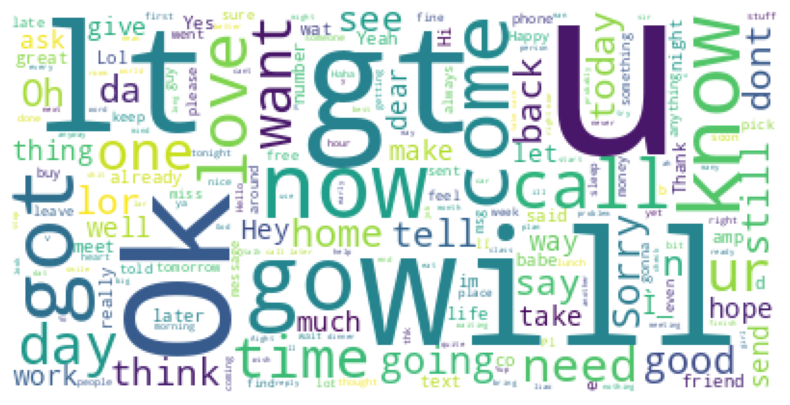

In [ ]:
word_cloud(hamdata)                               # More frequent words are greater in size

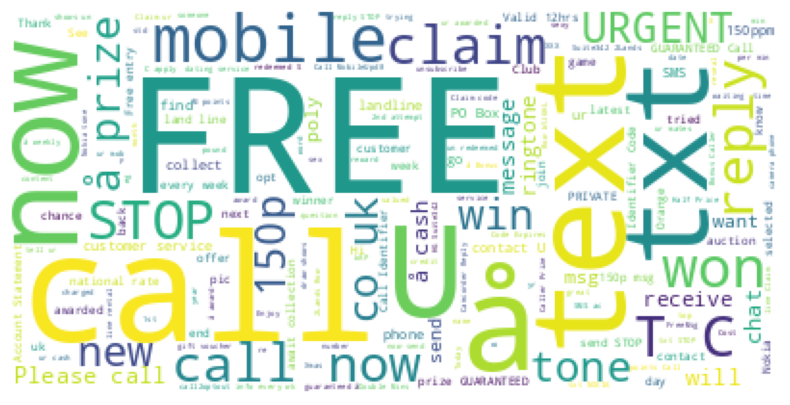

In [ ]:
# Extracting the text of only 'Spam' data

spamdata = data[data['Label'] == 'spam']
spamdata = spamdata['Text']

word_cloud(spamdata)

# Featurization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer            # This is to convert our data from text to vector as algorithm works on vectors

In [ ]:
cv = CountVectorizer()                              # Applying the bag of words approach

# fit_transform() learns the vocabulary dictionary from document and transform them to matrix
# fit_transform() creates a sparse matrix(matrix in which maximum element has value equal to zero) and toarray() is used to convert it to dense matrix that is even storing the data with zero value
X = cv.fit_transform(data['Text']).toarray()

In [ ]:
# Hot encoding: One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

y = pd.get_dummies(data['Label'])
y = y['spam'].values

# Model

In [ ]:
from sklearn.model_selection import train_test_split

# Specifying the test size to 0.3 means splitting the data in 70% train data and 30% test data. It can also be done using train_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)

## Naive Bayes Algorithm

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems and mainly used for spam filteration.

Multinomial Naive Bayes is a popular machine learning algorithm for text classification problems in Natural Language Processing (NLP). It is particularly useful for problems that involve text data with discrete features such as word frequency counts.

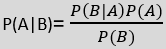


Image source: Google


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)                        # Fitting the data to model means model is learning patterns from training set

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
Y_test[:10], y_pred[:10]

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=uint8))

# Model Evaluation

In [ ]:
print("Accuracy of our model: ", end = "")
print(model.score(X_test, Y_test))

Accuracy of our model: 0.9844497607655502


Accuracy:  0.9844497607655502


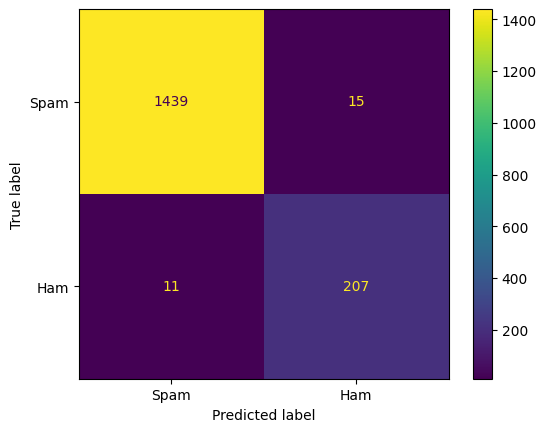

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy: ", accuracy_score(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)                                       # It creates the confusion matrix
cm = ConfusionMatrixDisplay(matrix, display_labels = ['Spam', 'Ham'])           # It displays the confusion matrix
cm.plot()